In [1]:
import time
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator
import sys
import os
import numpy as np
import itertools
import seaborn as sns

sys.path.insert(0, os.path.join(os.getcwd(), "..", "kNN_NBC", "x64", "Release"))
import pynbc

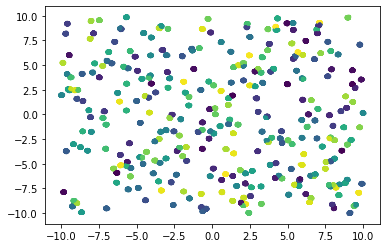

In [62]:
d, s = make_blobs(n_samples = int(1e5), centers = int(1e5 ** 0.5), n_features = 2, random_state = 12345, cluster_std = 10/(1e5 ** 0.5))
plt.scatter(d[:,0], d[:,1], c=s, marker='.')

# Performance test

Performance test used artificial datasets with following parameters:
  - Number of samples:
    - 100,
    - 1000,
    - 10000,
    - 100000

  - Number of dimensions:
    - 2,
    - 4,
    - 8,
    - 16,
    - 32

All experiments were performed for k = 10, for KNN and K+NN, with and without parallelization.
Each experiment was repeated 3 times.

Experiments were performed using Intel Core i7-6700 HQ CPU with 8 logical processors.

In [63]:
def test_kNN(samples, dimension, k, parallel, s=0):
    print(f"KNN Test: {samples} samples, {dimension} dimension, k={k}, parallel: {parallel}")
    dataset = make_blobs(n_samples = samples, centers = int(samples ** 0.5), n_features = dimension, cluster_std=10/(samples ** 0.5), random_state = 12345)
    
    start = time.time()
    pynbc.nbc_kNN(k, s, dataset[0], parallel)
    end = time.time()
    return end - start;


In [64]:
def test_kpNN(samples, dimension, k, parallel, s=0):
    print(f"K+NN Test: {samples} samples, {dimension} dimension, k={k}, parallel: {parallel}")
    dataset = make_blobs(n_samples = samples, centers = int(samples ** 0.5), n_features = dimension, cluster_std=10/(samples ** 0.5), random_state = 12345)
    
    start = time.time()
    pynbc.nbc_kpNN(k, s, dataset[0], parallel)
    end = time.time()
    return end - start;


In [6]:
samples = [100, 1000, 10000, 100000]
dims = [2, 4, 8, 16, 32]
ks = [10]
parallel = [False, True]
params = list(itertools.product(samples, dims, ks, parallel))
n_tries = 3

In [65]:
results_kNN = [
    [test_kNN(s, d, k, p) for _ in range(n_tries)] for s, d, k, p in params
]

KNN Test: 100 samples, 2 dimension, k=10, parallel: False
KNN Test: 100 samples, 2 dimension, k=10, parallel: False
KNN Test: 100 samples, 2 dimension, k=10, parallel: False
KNN Test: 100 samples, 2 dimension, k=10, parallel: True
KNN Test: 100 samples, 2 dimension, k=10, parallel: True
KNN Test: 100 samples, 2 dimension, k=10, parallel: True
KNN Test: 100 samples, 4 dimension, k=10, parallel: False
KNN Test: 100 samples, 4 dimension, k=10, parallel: False
KNN Test: 100 samples, 4 dimension, k=10, parallel: False
KNN Test: 100 samples, 4 dimension, k=10, parallel: True
KNN Test: 100 samples, 4 dimension, k=10, parallel: True
KNN Test: 100 samples, 4 dimension, k=10, parallel: True
KNN Test: 100 samples, 8 dimension, k=10, parallel: False
KNN Test: 100 samples, 8 dimension, k=10, parallel: False
KNN Test: 100 samples, 8 dimension, k=10, parallel: False
KNN Test: 100 samples, 8 dimension, k=10, parallel: True
KNN Test: 100 samples, 8 dimension, k=10, parallel: True
KNN Test: 100 samples,

In [66]:
results_kpNN = [
    [test_kpNN(s, d, k, p) for _ in range(n_tries)] for s, d, k, p in params
]

K+NN Test: 100 samples, 2 dimension, k=10, parallel: False
K+NN Test: 100 samples, 2 dimension, k=10, parallel: False
K+NN Test: 100 samples, 2 dimension, k=10, parallel: False
K+NN Test: 100 samples, 2 dimension, k=10, parallel: True
K+NN Test: 100 samples, 2 dimension, k=10, parallel: True
K+NN Test: 100 samples, 2 dimension, k=10, parallel: True
K+NN Test: 100 samples, 4 dimension, k=10, parallel: False
K+NN Test: 100 samples, 4 dimension, k=10, parallel: False
K+NN Test: 100 samples, 4 dimension, k=10, parallel: False
K+NN Test: 100 samples, 4 dimension, k=10, parallel: True
K+NN Test: 100 samples, 4 dimension, k=10, parallel: True
K+NN Test: 100 samples, 4 dimension, k=10, parallel: True
K+NN Test: 100 samples, 8 dimension, k=10, parallel: False
K+NN Test: 100 samples, 8 dimension, k=10, parallel: False
K+NN Test: 100 samples, 8 dimension, k=10, parallel: False
K+NN Test: 100 samples, 8 dimension, k=10, parallel: True
K+NN Test: 100 samples, 8 dimension, k=10, parallel: True
K+NN 

Results for KNN (mean and standard deviation):

In [75]:
list(zip(params, zip(np.mean(results_kNN, axis=1), np.std(results_kNN, axis=1))))

[((100, 2, 10, False), (0.000675360361735026, 0.00047763952988588406)),
 ((100, 2, 10, True), (0.0006686051686604818, 0.0004727752587156595)),
 ((100, 4, 10, False), (0.0020049413045247397, 5.947204250930057e-07)),
 ((100, 4, 10, True), (0.0006680488586425781, 0.00047238187811010033)),
 ((100, 8, 10, False), (0.0030075709025065103, 4.052336624139774e-07)),
 ((100, 8, 10, True), (0.0010026295979817708, 2.247831920581015e-07)),
 ((100, 16, 10, False), (0.004010915756225586, 0.0)),
 ((100, 16, 10, True), (0.0016709963480631511, 0.0004724944301127568)),
 ((100, 32, 10, False), (0.006350278854370117, 0.0004725505557221485)),
 ((100, 32, 10, True), (0.002673943837483724, 0.0004726067013942837)),
 ((1000, 2, 10, False), (0.015041192372639975, 2.247831920581015e-07)),
 ((1000, 2, 10, True), (0.006016333897908528, 1.1239159602905075e-07)),
 ((1000, 4, 10, False), (0.024733940760294598, 0.0012503572483651992)),
 ((1000, 4, 10, True), (0.008356094360351562, 0.0004728877304459091)),
 ((1000, 8, 10

Results for K+NN (mean and standard deviation):

In [76]:
list(zip(params, zip(np.mean(results_kpNN, axis=1), np.std(results_kpNN, axis=1))))

[((100, 2, 10, False), (0.0013365745544433594, 0.0002363598471096352)),
 ((100, 2, 10, True), (0.0006678899129231771, 0.00023596633653529087)),
 ((100, 4, 10, False), (0.0016702810923258464, 0.00023641622315991858)),
 ((100, 4, 10, True), (0.0010023117065429688, 3.8933590933214475e-07)),
 ((100, 8, 10, False), (0.0026738643646240234, 0.00023619095911065174)),
 ((100, 8, 10, True), (0.001336495081583659, 0.00023613482349852318)),
 ((100, 16, 10, False), (0.00417780876159668, 0.00023652861451792828)),
 ((100, 16, 10, True), (0.002340078353881836, 0.00023619111955540308)),
 ((100, 32, 10, False), (0.006684700647989909, 0.00023641574228364107)),
 ((100, 32, 10, True), (0.0036760171254475913, 0.00023613474325703563)),
 ((1000, 2, 10, False), (0.01621135075887044, 0.0002366405254566666)),
 ((1000, 2, 10, True), (0.006517728169759114, 5.947204250930057e-07)),
 ((1000, 4, 10, False), (0.027241230010986328, 0.00023669678128816166)),
 ((1000, 4, 10, True), (0.010528882344563803, 0.00070846059272

In [77]:
results_no_ti_knn = []

In [81]:
results_no_ti_knn.extend([
    [test_kNN(s, d, k, p, -1) for _ in range(n_tries)] for s, d, k, p in params if s == 100000 and d < 16
])

KNN Test: 100000 samples, 2 dimension, k=10, parallel: False
KNN Test: 100000 samples, 2 dimension, k=10, parallel: False
KNN Test: 100000 samples, 2 dimension, k=10, parallel: False
KNN Test: 100000 samples, 2 dimension, k=10, parallel: True
KNN Test: 100000 samples, 2 dimension, k=10, parallel: True
KNN Test: 100000 samples, 2 dimension, k=10, parallel: True
KNN Test: 100000 samples, 4 dimension, k=10, parallel: False
KNN Test: 100000 samples, 4 dimension, k=10, parallel: False
KNN Test: 100000 samples, 4 dimension, k=10, parallel: False
KNN Test: 100000 samples, 4 dimension, k=10, parallel: True
KNN Test: 100000 samples, 4 dimension, k=10, parallel: True
KNN Test: 100000 samples, 4 dimension, k=10, parallel: True
KNN Test: 100000 samples, 8 dimension, k=10, parallel: False
KNN Test: 100000 samples, 8 dimension, k=10, parallel: False
KNN Test: 100000 samples, 8 dimension, k=10, parallel: False
KNN Test: 100000 samples, 8 dimension, k=10, parallel: True
KNN Test: 100000 samples, 8 dim

In [78]:
results_no_ti_kpnn = []

In [82]:
results_no_ti_kpnn.extend([
    [test_kpNN(s, d, k, p, -1) for _ in range(n_tries)] for s, d, k, p in params if s == 100000 and d < 16
])

K+NN Test: 100000 samples, 2 dimension, k=10, parallel: False
K+NN Test: 100000 samples, 2 dimension, k=10, parallel: False
K+NN Test: 100000 samples, 2 dimension, k=10, parallel: False
K+NN Test: 100000 samples, 2 dimension, k=10, parallel: True
K+NN Test: 100000 samples, 2 dimension, k=10, parallel: True
K+NN Test: 100000 samples, 2 dimension, k=10, parallel: True
K+NN Test: 100000 samples, 4 dimension, k=10, parallel: False
K+NN Test: 100000 samples, 4 dimension, k=10, parallel: False
K+NN Test: 100000 samples, 4 dimension, k=10, parallel: False
K+NN Test: 100000 samples, 4 dimension, k=10, parallel: True
K+NN Test: 100000 samples, 4 dimension, k=10, parallel: True
K+NN Test: 100000 samples, 4 dimension, k=10, parallel: True
K+NN Test: 100000 samples, 8 dimension, k=10, parallel: False
K+NN Test: 100000 samples, 8 dimension, k=10, parallel: False
K+NN Test: 100000 samples, 8 dimension, k=10, parallel: False
K+NN Test: 100000 samples, 8 dimension, k=10, parallel: True
K+NN Test: 1000

In [29]:
len(results_no_ti_knn)

36

In [87]:
list(zip(params, zip(np.mean(results_no_ti_knn, axis=1), np.std(results_no_ti_knn, axis=1))))

[((100, 2, 10, False), (0.0013519128163655598, 0.0004799577538640101)),
 ((100, 2, 10, True), (0.0006686846415201823, 0.0004728314444942165)),
 ((100, 4, 10, False), (0.0023392836252848306, 0.0004726066613021584)),
 ((100, 4, 10, True), (0.0006683667500813802, 0.0004726067013942837)),
 ((100, 8, 10, False), (0.003341833750406901, 0.0004724381641475821)),
 ((100, 8, 10, True), (0.00167083740234375, 0.0004727190528981875)),
 ((100, 16, 10, False), (0.004010518391927083, 4.49566384116203e-07)),
 ((100, 16, 10, True), (0.0023393630981445312, 0.00047221338099847975)),
 ((100, 32, 10, False), (0.006684939066569011, 0.0004713141679983425)),
 ((100, 32, 10, True), (0.004010518391927083, 4.052336624139774e-07)),
 ((1000, 2, 10, False), (0.05147178967793783, 0.00778144277254473)),
 ((1000, 2, 10, True), (0.012366215387980143, 0.004038998872354868)),
 ((1000, 4, 10, False), (0.06383768717447917, 0.016563810228768742)),
 ((1000, 4, 10, True), (0.011363983154296875, 0.0009456066981998496)),
 ((1000

In [88]:
list(zip(params, zip(np.mean(results_no_ti_kpnn, axis=1), np.std(results_no_ti_kpnn, axis=1))))

[((100, 2, 10, False), (0.0016709963480631511, 0.00047266286712201297)),
 ((100, 2, 10, True), (0.0010028680165608723, 6.836513890459241e-07)),
 ((100, 4, 10, False), (0.002339522043863932, 0.0004722698476006887)),
 ((100, 4, 10, True), (0.0010034243265787761, 1.0721474936192862e-06)),
 ((100, 8, 10, False), (0.0033425490061442056, 0.0004727752587156595)),
 ((100, 8, 10, True), (0.001336812973022461, 0.0004718761259665186)),
 ((100, 16, 10, False), (0.0043451786041259766, 0.0004727192132285398)),
 ((100, 16, 10, True), (0.0020058155059814453, 5.150429962800233e-07)),
 ((100, 32, 10, False), (0.0070189634958903, 1.1239159602905075e-07)),
 ((100, 32, 10, True), (0.0036760965983072915, 0.00047266294729672516)),
 ((1000, 2, 10, False), (0.05113720893859863, 0.01107510380681758)),
 ((1000, 2, 10, True), (0.016711314519246418, 0.0012514830259147424)),
 ((1000, 4, 10, False), (0.06218059857686361, 0.017719626561385513)),
 ((1000, 4, 10, True), (0.015708287556966145, 0.005451301528832135)),
 (

In [69]:
def get_mean_time(results, parallelisation):
    return np.mean([r for (_, _, _, p), r in zip(params, results) if p == parallelisation], axis=1)

In [92]:
np.isnan([np.nan, 1, 3])

array([ True, False, False])

In [93]:
def show_heatmap(values, title, log_scale=False):
    missing = len(samples) * len(dims) - len(values)
    if missing > 0:
        values = np.append(values, [np.nan] * missing)
    values = np.reshape(values, (len(samples), len(dims)))
    sns.heatmap(
        values,
        annot=True, xticklabels=dims, yticklabels=samples,
        norm=LogNorm(vmin=values.min(), vmax=values.max()) if log_scale else None,
        cbar_kws={'ticks': LogLocator()} if log_scale else None,
        mask = np.isnan(values)
    )
    plt.ylabel('samples')
    plt.xlabel('dimensions')
    plt.title(title)
    plt.show()

def show_results_heatmap(results, results_label, parallelisation):
    values = get_mean_time(results, parallelisation)
    title = f'{results_label}\n{"With" if parallelisation else "Without"} parallelisation'
    show_heatmap(values, title, True)

Mean execution times are presented on the following diagrams:

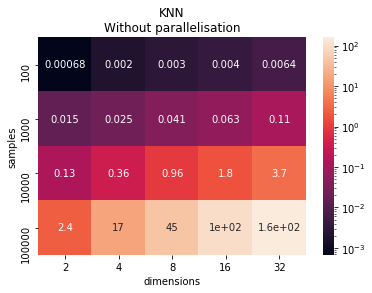

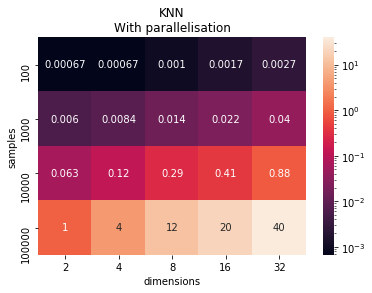

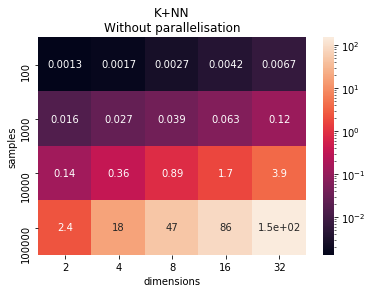

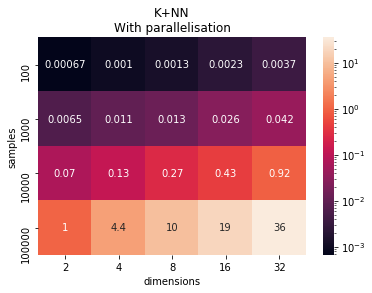

d:\projects\return-of-the-neighbours\rotn\lib\site-packages\matplotlib\colors.py:1110: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


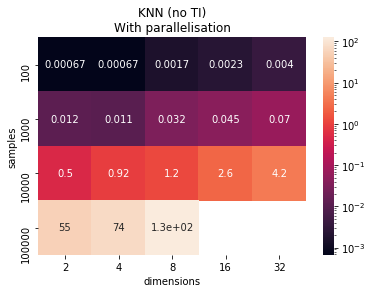

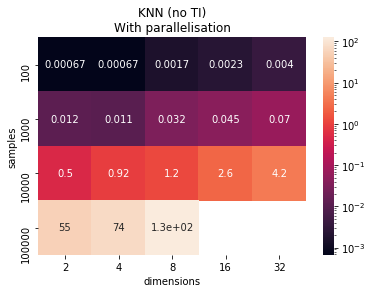

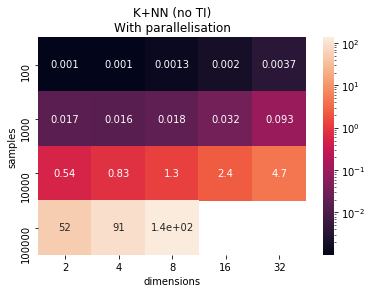

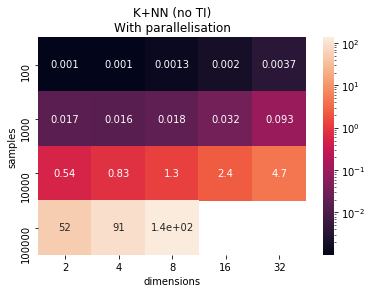

In [95]:
show_results_heatmap(results_kNN, 'KNN', False)
show_results_heatmap(results_kNN, 'KNN', True)
show_results_heatmap(results_kpNN, 'K+NN', False)
show_results_heatmap(results_kpNN, 'K+NN', True)
show_results_heatmap(results_no_ti_knn, 'KNN (no TI)', True)
show_results_heatmap(results_no_ti_knn, 'KNN (no TI)', True)
show_results_heatmap(results_no_ti_kpnn, 'K+NN (no TI)', True)
show_results_heatmap(results_no_ti_kpnn, 'K+NN (no TI)', True)

In [73]:
def show_parallelisation_speed_increase_heatmap(results, alg_name):
    ratio = get_mean_time(results, False) / get_mean_time(results, True)
    title = f'{alg_name}\nParallelisation speed increase'
    show_heatmap(ratio, title)

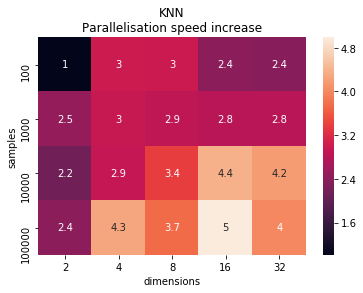

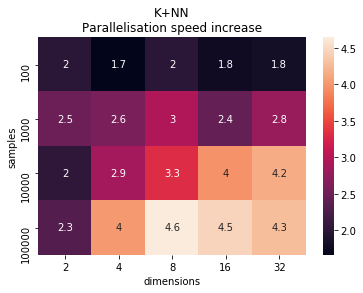

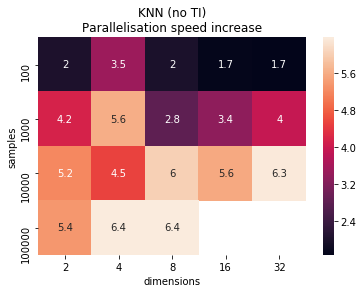

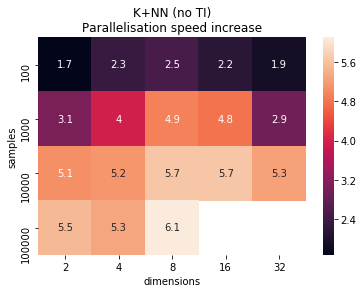

In [97]:
show_parallelisation_speed_increase_heatmap(results_kNN, 'KNN')
show_parallelisation_speed_increase_heatmap(results_kpNN, 'K+NN')
show_parallelisation_speed_increase_heatmap(results_no_ti_knn, 'KNN (no TI)')
show_parallelisation_speed_increase_heatmap(results_no_ti_kpnn, 'K+NN (no TI)')

In [102]:
def show_ti_speed_increase_heatmap(results, results_no_ti, alg_name):
    mean_no_ti = get_mean_time(results_no_ti, False)
    mean = get_mean_time(results, False)
    ratio = mean_no_ti[:len(mean)] / mean[:len(mean_no_ti)]
    title = f'{alg_name}\nTI speed increase'
    show_heatmap(ratio, title)

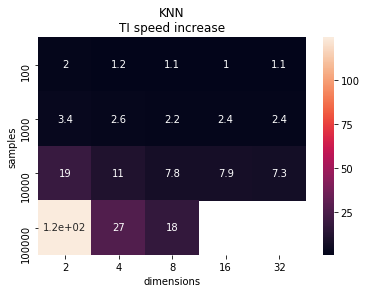

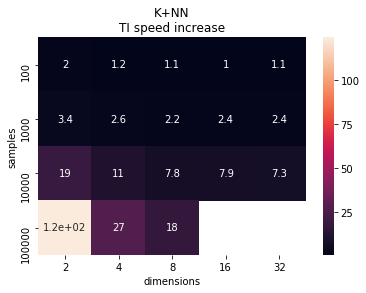

In [104]:
show_ti_speed_increase_heatmap(results_kNN, results_no_ti_knn, 'KNN')
show_ti_speed_increase_heatmap(results_kNN, results_no_ti_knn, 'K+NN')

In [106]:
# in order to save results
import pickle

with open('results.pickle', 'wb') as file:
    pickle.dump((results_kNN, results_kpNN), file)
with open('performance_no_ti_knn.pickle', 'wb') as f:
    pickle.dump(results_no_ti_knn, f)
with open('performance_no_ti_kpnn.pickle', 'wb') as f:
    pickle.dump(results_no_ti_kpnn, f)

In [70]:
# in order to load saved results

import pickle

with open('results.pickle', 'rb') as file:
    results_kNN, results_kpNN = pickle.load(file)
with open('performance_no_ti_knn.pickle', 'rb') as f:
    results_no_ti_knn = pickle.load(f)
with open('performance_no_ti_kpnn.pickle', 'rb') as f:
    results_no_ti_kpnn = pickle.load(f)